In [57]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt;plt.rcdefaults()


In [9]:
# Data reading form the csv file
data=pd.read_csv("amazon.csv",thousands='.')

In [14]:
# data description
data.describe(include='all')

,year,state,month,number,date
count,6454.000000,6454,6454,6454.000000,6454
unique,NaN,23,12,NaN,20
top,NaN,Rio,Janeiro,NaN,2004-01-01
freq,NaN,717,541,NaN,324
mean,2007.461729,NaN,NaN,522.696312,NaN
std,5.746654,NaN,NaN,1554.846486,NaN
min,1998.000000,NaN,NaN,0.000000,NaN
25%,2002.000000,NaN,NaN,9.000000,NaN
50%,2007.000000,NaN,NaN,54.000000,NaN
75%,2012.000000,NaN,NaN,269.000000,NaN


In [17]:
# check for any missing values
data.isna().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

### Break the dataset into smaller subsets:

The first thought I had was to visualise the number of forest fires over the years, over the months. You need to be able to identify smaller pieces of the bigger picture.

Let’s drop rows from the dataset that aren’t contributing to the number of forest fires. So, any row with number column value as 0, must be dropped. We first convert the 0s to NaN and then drop rows with NaN in the specific column number.

In [20]:
data = data.replace(0, np.nan)
data2 = data.dropna(subset=['number'])

Our dataset is now reduced from 6454 to 5837 rows.


In [21]:
data2.describe(include='all')

,year,state,month,number,date
count,5837.000000,5837,5837,5837.000000,5837
unique,NaN,23,12,NaN,20
top,NaN,Rio,Outubro,NaN,2016-01-01
freq,NaN,661,534,NaN,317
mean,2007.834847,NaN,NaN,577.947918,NaN
std,5.649076,NaN,NaN,1625.176973,NaN
min,1998.000000,NaN,NaN,1.000000,NaN
25%,2003.000000,NaN,NaN,16.000000,NaN
50%,2008.000000,NaN,NaN,72.000000,NaN
75%,2013.000000,NaN,NaN,334.000000,NaN


In [38]:
### Grouping the data 
fires_per_month=data2.groupby("month")['number'].sum()
fires_per_month

month
Abril          28364.0
Agosto        740841.0
Dezembro      152596.0
Fevereiro      30952.0
Janeiro        52587.0
Julho         217620.0
Junho         111405.0
Maio           46083.0
Mar�o          35118.0
Novembro      312326.0
Outubro       629665.0
Setembro     1015925.0
Name: number, dtype: float64

In [29]:
uniquemonths=list(data.month.unique())
uniquemonths

['Janeiro',
 'Fevereiro',
 'Mar�o',
 'Abril',
 'Maio',
 'Junho',
 'Julho',
 'Agosto',
 'Setembro',
 'Outubro',
 'Novembro',
 'Dezembro']

In [48]:
fires_per_month=fires_per_month.reindex(uniquemonths,axis=0)

In [49]:
fires_per_month=fires_per_month.to_frame()

In [50]:
fires_per_month


,number
month,
Janeiro,52587.0
Fevereiro,30952.0
Mar�o,35118.0
Abril,28364.0
Maio,46083.0
Junho,111405.0
Julho,217620.0
Agosto,740841.0
Setembro,1015925.0


<AxesSubplot:xlabel='month'>

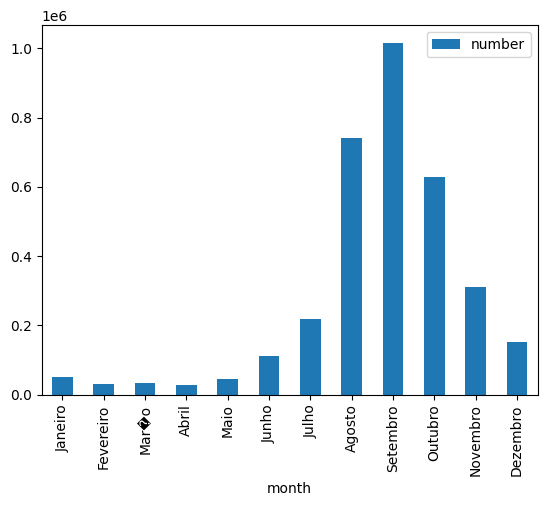

In [58]:
fires_per_month.plot.bar()